<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 118.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 144.2 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 171.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 118.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 162.4 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-04-23 03:24:36--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  59.1MB/s    in 2.6s    

2025-04-23 03:24:38 (59.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


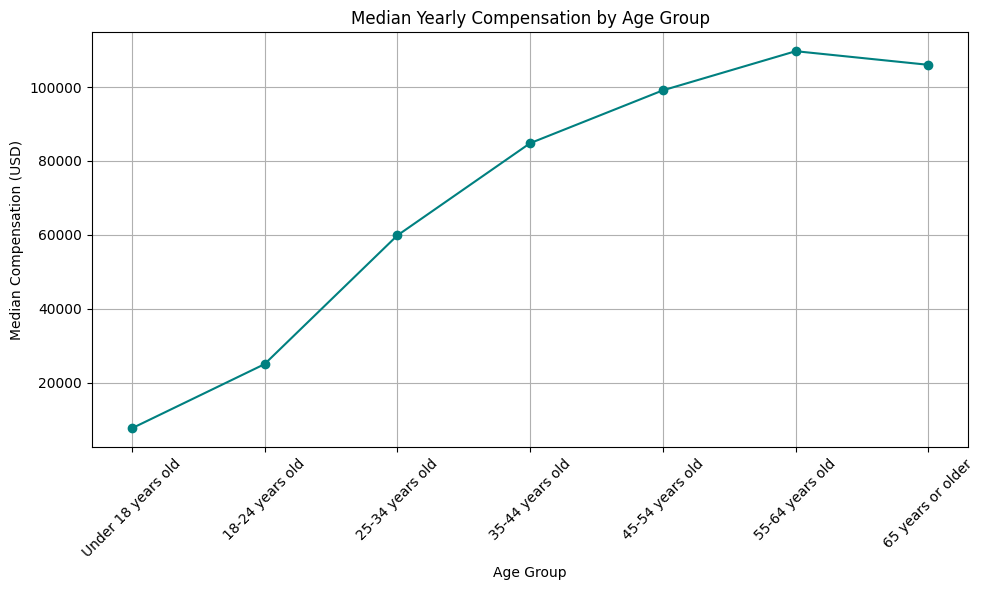

In [12]:
## Write your code here
# Filter and group
df_comp_age = df[['Age', 'ConvertedCompYearly']].dropna()
median_comp_by_age = df_comp_age.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# Sort age groups in a custom order
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old',
             '45-54 years old', '55-64 years old', '65 years or older']

median_comp_by_age['Age'] = pd.Categorical(median_comp_by_age['Age'], categories=age_order, ordered=True)
median_comp_by_age = median_comp_by_age.sort_values('Age').dropna()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(median_comp_by_age['Age'], median_comp_by_age['ConvertedCompYearly'], marker='o', linestyle='-', color='teal')
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


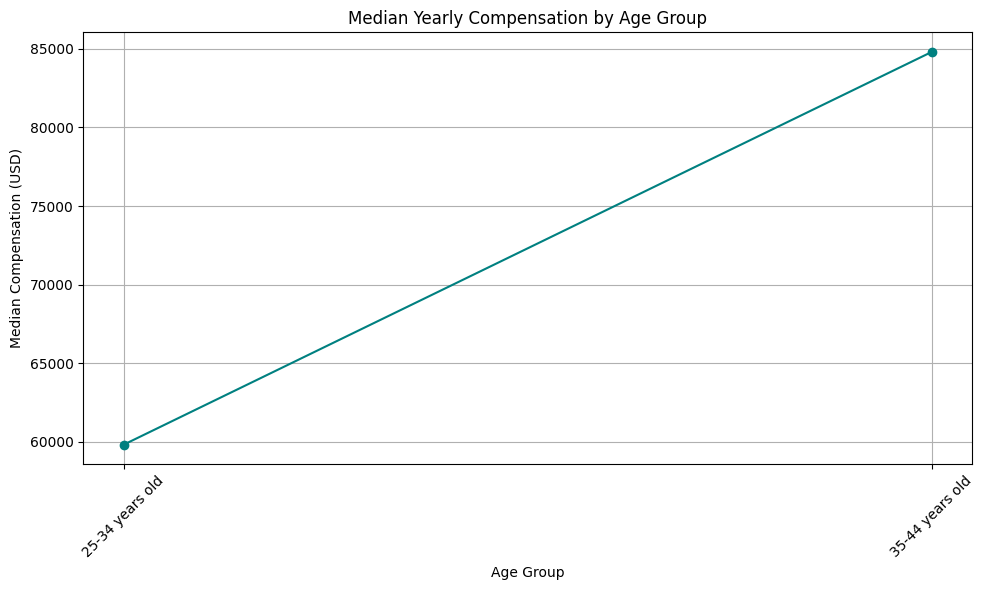

In [13]:
## Write your code here
df_comp_age = df[['Age', 'ConvertedCompYearly']].dropna()
median_comp_by_age = df_comp_age.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# Sort age groups in a custom order
age_order = [ '25-34 years old', '35-44 years old']

median_comp_by_age['Age'] = pd.Categorical(median_comp_by_age['Age'], categories=age_order, ordered=True)
median_comp_by_age = median_comp_by_age.sort_values('Age').dropna()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(median_comp_by_age['Age'], median_comp_by_age['ConvertedCompYearly'], marker='o', linestyle='-', color='teal')
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


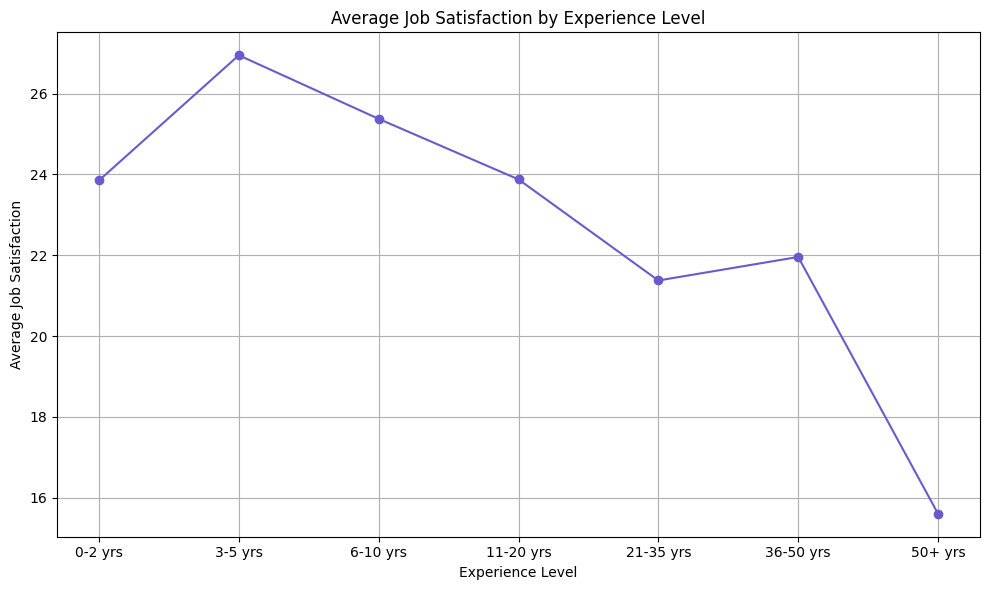

In [15]:
## Write your code here
df_filtered = df[['YearsCodePro', 'JobSatPoints_6']].copy()
df_filtered = df_filtered.replace({'YearsCodePro': {
    'Less than 1 year': 0.5,
    'More than 50 years': 55
}})
df_filtered = df_filtered.dropna()
df_filtered['YearsCodePro'] = pd.to_numeric(df_filtered['YearsCodePro'], errors='coerce')
df_filtered['JobSatPoints_6'] = pd.to_numeric(df_filtered['JobSatPoints_6'], errors='coerce')

# Step 2: Create experience bins
bins = [0, 2, 5, 10, 20, 35, 50, 100]
labels = ['0-2 yrs', '3-5 yrs', '6-10 yrs', '11-20 yrs', '21-35 yrs', '36-50 yrs', '50+ yrs']
df_filtered['ExperienceLevel'] = pd.cut(df_filtered['YearsCodePro'], bins=bins, labels=labels, right=False)

# Step 3: Group by bin and calculate mean satisfaction
grouped = df_filtered.groupby('ExperienceLevel',observed=False)['JobSatPoints_6'].mean().reset_index()

# Step 4: Plot
plt.figure(figsize=(10, 6))
plt.plot(grouped['ExperienceLevel'], grouped['JobSatPoints_6'], marker='o', linestyle='-', color='slateblue')
plt.title('Average Job Satisfaction by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Job Satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


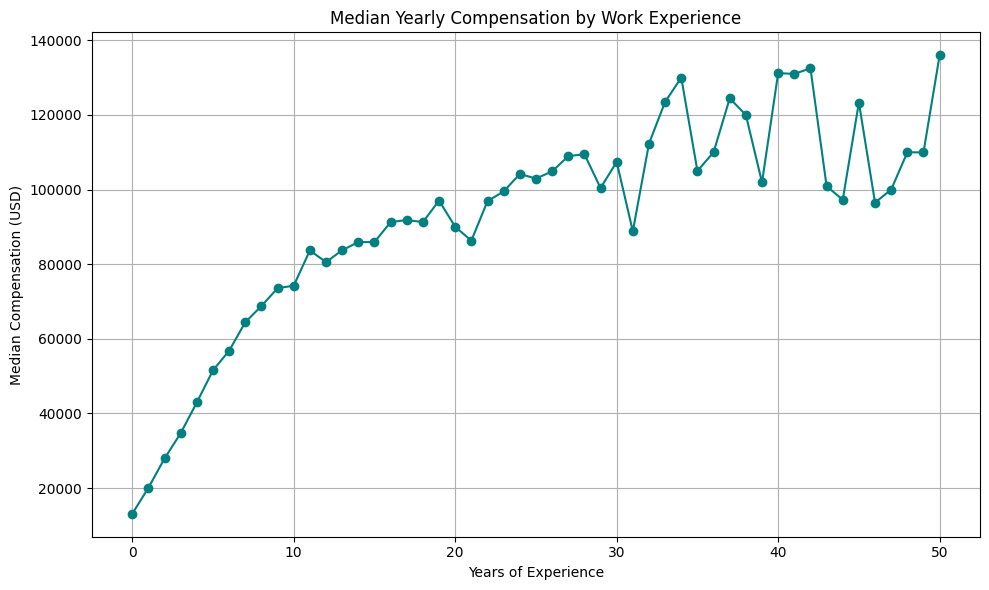

In [16]:
## Write your code here
df_exp = df[['WorkExp', 'ConvertedCompYearly']].copy()
df_exp = df_exp.replace({'WorkExp': {
    'Less than 1 year': 0.5,
    'More than 50 years': 55
}})
df_exp.dropna(inplace=True)

# Convert to numeric
df_exp['WorkExp'] = pd.to_numeric(df_exp['WorkExp'], errors='coerce')
df_exp['ConvertedCompYearly'] = pd.to_numeric(df_exp['ConvertedCompYearly'], errors='coerce')

# Optional: Filter extreme compensation values (remove top 1% outliers)
df_exp = df_exp[df_exp['ConvertedCompYearly'] < df_exp['ConvertedCompYearly'].quantile(0.99)]

# Step 2: Group by experience and calculate median compensation
grouped_median = df_exp.groupby('WorkExp')['ConvertedCompYearly'].median().reset_index()

# Step 3: Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(grouped_median['WorkExp'], grouped_median['ConvertedCompYearly'], marker='o', linestyle='-', color='teal')
plt.title('Median Yearly Compensation by Work Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Median Compensation (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


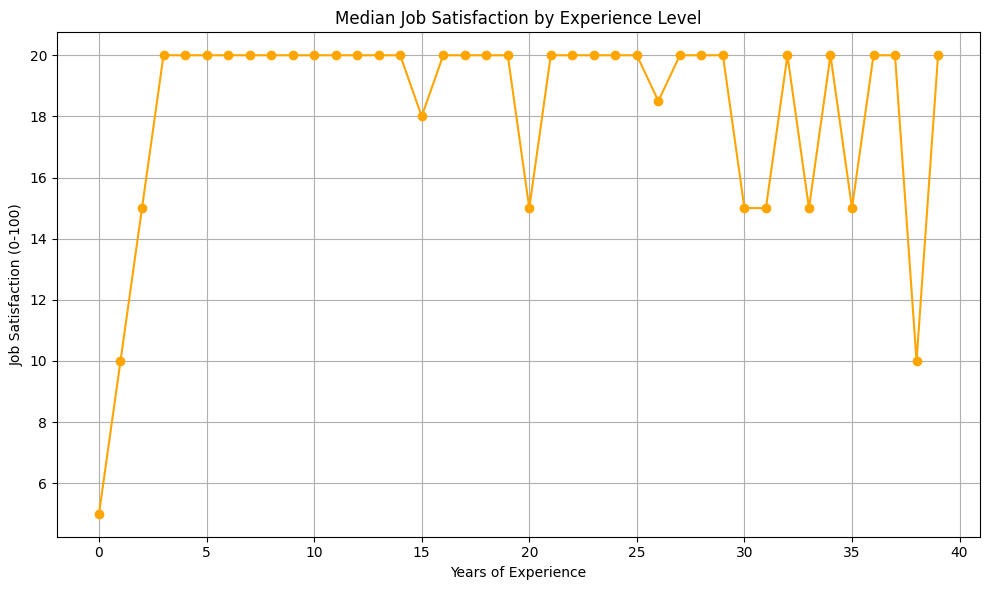

In [17]:
## Write your code here
df_sat = df[['WorkExp', 'JobSatPoints_6']].copy()

# Replace text-based experience values
df_sat['WorkExp'] = df_sat['WorkExp'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 55
})

# Drop rows with missing values
df_sat.dropna(inplace=True)

# Convert to numeric
df_sat['WorkExp'] = pd.to_numeric(df_sat['WorkExp'], errors='coerce')
df_sat['JobSatPoints_6'] = pd.to_numeric(df_sat['JobSatPoints_6'], errors='coerce')

# Optional: filter extreme WorkExp values
df_sat = df_sat[df_sat['WorkExp'] < df_sat['WorkExp'].quantile(0.99)]

# Step 2: Group by experience and calculate median satisfaction
satisfaction_by_exp = df_sat.groupby('WorkExp')['JobSatPoints_6'].median().reset_index()

# Step 3: Plot
plt.figure(figsize=(10, 6))
plt.plot(satisfaction_by_exp['WorkExp'], satisfaction_by_exp['JobSatPoints_6'], marker='o', linestyle='-', color='orange')
plt.title('Median Job Satisfaction by Experience Level')
plt.xlabel('Years of Experience')
plt.ylabel('Job Satisfaction (0-100)')
plt.grid(True)
plt.tight_layout()
plt.show()

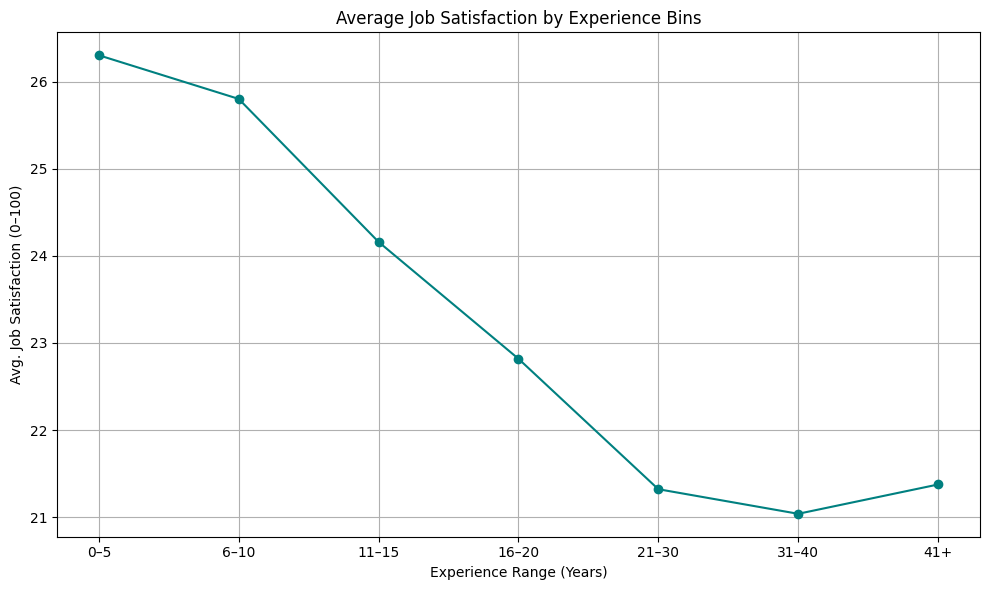

In [19]:
df_exp = df[['WorkExp', 'JobSatPoints_6']].copy()

# Replace textual values
df_exp['WorkExp'] = df_exp['WorkExp'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 55
})

# Convert to numeric and drop missing
df_exp['WorkExp'] = pd.to_numeric(df_exp['WorkExp'], errors='coerce')
df_exp['JobSatPoints_6'] = pd.to_numeric(df_exp['JobSatPoints_6'], errors='coerce')
df_exp.dropna(inplace=True)

# Define experience bins and labels
bins = [0, 5, 10, 15, 20, 30, 40, 60]
labels = ['0–5', '6–10', '11–15', '16–20', '21–30', '31–40', '41+']
df_exp['ExperienceRange'] = pd.cut(df_exp['WorkExp'], bins=bins, labels=labels, right=False)

# Group by bins and calculate average or median satisfaction
grouped = df_exp.groupby('ExperienceRange',observed=False)['JobSatPoints_6'].mean().reset_index()

# Step 2: Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(grouped['ExperienceRange'], grouped['JobSatPoints_6'], marker='o', linestyle='-', color='teal')
plt.title('Average Job Satisfaction by Experience Bins')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Avg. Job Satisfaction (0–100)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
